In [88]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import plotly.express as px
import seaborn as sns
import os
from datetime import datetime
from importlib import reload
import functions
reload(functions)

<module 'functions' from '/home/elmunoz42/aimlbootcamp/aimlbootcamp/universal-analytics-data/functions.py'>

In [89]:
# Cosolidate the Data into a pages CSV file with all quarters.
try:
    df = functions.build_ua_pages_dataframe('wtt/Pages/', 'pages')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/wtt/Pages/Analytics GA-021824 Pages 20230401-20230630.csv
Successfully processed Analytics GA-021824 Pages 20230401-20230630.csv
Processing file: data/wtt/Pages/Analytics GA-021824 Pages 20230701-20230930.csv
Successfully processed Analytics GA-021824 Pages 20230701-20230930.csv
Processing file: data/wtt/Pages/Analytics GA-021824 Pages 20220401-20220630.csv
Successfully processed Analytics GA-021824 Pages 20220401-20220630.csv
Processing file: data/wtt/Pages/Analytics GA-021824 Pages 20220701-20220930.csv
Successfully processed Analytics GA-021824 Pages 20220701-20220930.csv
Processing file: data/wtt/Pages/Analytics GA-021824 Pages 20221001-20221231.csv
Successfully processed Analytics GA-021824 Pages 20221001-20221231.csv
Processing file: data/wtt/Pages/Analytics GA-021824 Pages 20211001-20211231.csv
Successfully processed Analytics GA-021824 Pages 20211001-20211231.csv
Processing file: data/wtt/Pages/Analytics GA-021824 Pages 20220101-20220331.csv
Successfully p

In [90]:
# Read the CSV file
df = pd.read_csv('output/wtt/Pages/consolidated-pages.csv')
# Display the DataFrame
print(df.head())

                                              Page Pageviews  \
0            /apps/janus/wildthingtax/select-slot/       396   
1         /apps/janus/wildthingtax/select-service/        93   
2           /apps/janus/wildthingtax/take-details/        60   
3  /apps/janus/wildthingtax/auto-complete-booking/        30   
4      /apps/janus/wildthingtax/booking-succeeded/        29   

   Unique Pageviews Avg. Time on Page  Entrances  Bounce Rate  % Exit  \
0             132.0          00:00:35       45.0          0.0  23.99%   
1              28.0          00:00:24       15.0          0.0  12.90%   
2              42.0          00:00:32        0.0          0.0  13.33%   
3              29.0          00:00:06        0.0          0.0   3.33%   
4              28.0          00:00:47        0.0          0.0  89.66%   

  Page Value  Year Quarter  
0      $0.00  2023      Q2  
1      $0.00  2023      Q2  
2      $0.00  2023      Q2  
3      $0.00  2023      Q2  
4      $0.00  2023      Q2  


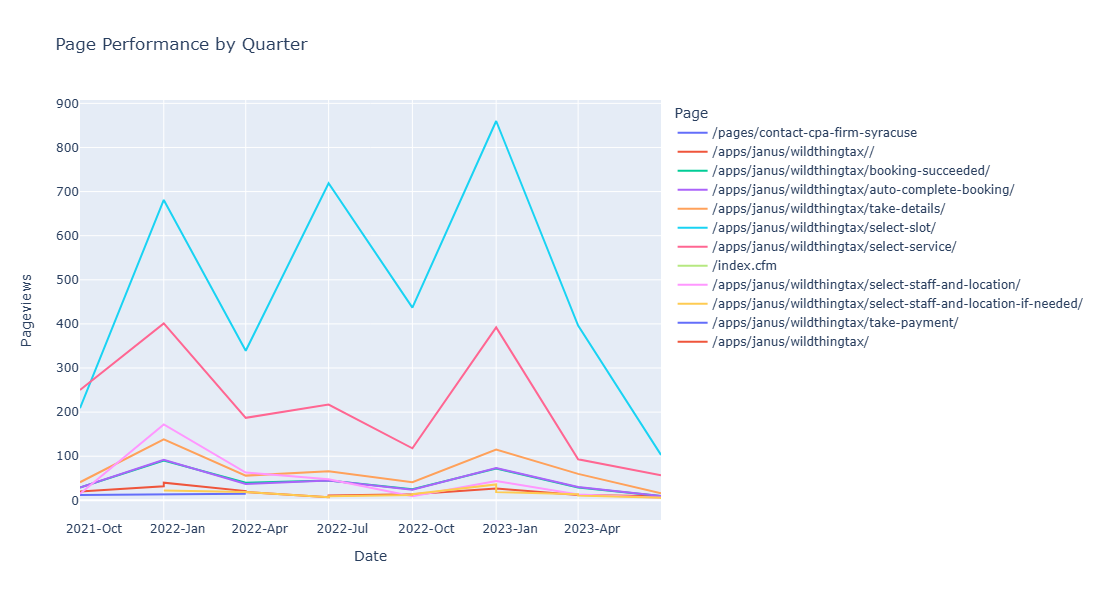

In [97]:
# Read the CSV file
df = pd.read_csv('output/wtt/Pages/consolidated-pages.csv')

# Remove query parameters from URLS:
df['Page'] = df['Page'].apply(lambda x: x.split('?')[0] if isinstance(x, str) and '?' in x else x)

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df['Pageviews'] = pd.to_numeric(df['Pageviews'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total and other excludes
exclude_list = ["total"]
fig = px.line(df.query('Page not in @exclude_list'), x='Date', y='Pageviews', color='Page', title='Page Performance by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/wtt/wtt-page-performance.html')

In [98]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('wtt/Sources/', 'sources')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/wtt/Sources/Analytics GA-021824 All Traffic 20230401-20230630.csv
Successfully processed Analytics GA-021824 All Traffic 20230401-20230630.csv
Processing file: data/wtt/Sources/Analytics GA-021824 All Traffic 20220401-20220630.csv
Successfully processed Analytics GA-021824 All Traffic 20220401-20220630.csv
Processing file: data/wtt/Sources/Analytics GA-021824 All Traffic 20220101-20220331.csv
Successfully processed Analytics GA-021824 All Traffic 20220101-20220331.csv
Processing file: data/wtt/Sources/Analytics GA-021824 All Traffic 20230101-20230331.csv
Successfully processed Analytics GA-021824 All Traffic 20230101-20230331.csv
Processing file: data/wtt/Sources/Analytics GA-021824 All Traffic 20221001-20221231.csv
Successfully processed Analytics GA-021824 All Traffic 20221001-20221231.csv
Processing file: data/wtt/Sources/Analytics GA-021824 All Traffic 20230701-20230930.csv
Successfully processed Analytics GA-021824 All Traffic 20230701-20230930.csv
Processing

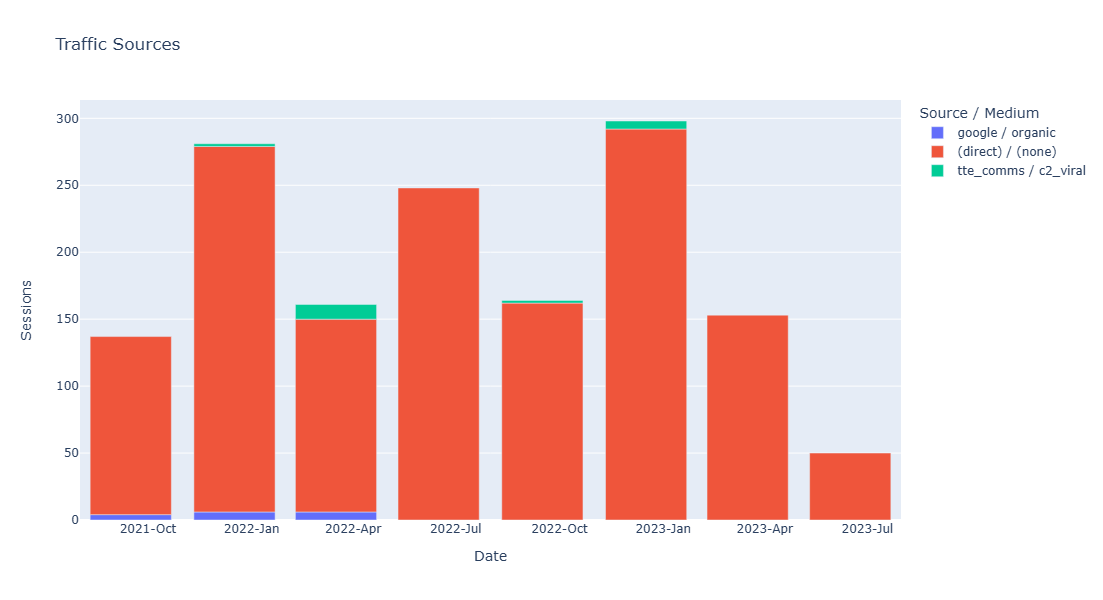

In [112]:

# Read the CSV file
df = pd.read_csv('output/wtt/Sources/consolidated-sources.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total and other excludes
include_list = [
    "(direct) / (none)",
    "google / organic",
    "tte_comms / c2_viral"
]
fig = px.bar(df.query('`Source / Medium` in @include_list'), x='Date', y='Sessions', color='Source / Medium', title='Traffic Sources')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1000,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/wtt/wtt-sources-mediums.html')

In [23]:
# Convert 'Date' from date time to date type
# df['Date'] = df['Date'].dt.date

# # Assuming df is your DataFrame and it has columns 'Date' and 'Pageviews'
# quarters = df['Date'].unique()
# # Update the layout

# for quarter in quarters:
#     df_quarter = df[df['Date'] == quarter]
#     fig = px.pie(df_quarter, values='Users', names='Source / Medium', title=f'Pie Chart for Quarter {quarter}')
#     fig.update_layout(
#         autosize=False,
#         width=600,  # Width of the figure in pixels
#         height=600  # Height of the figure in pixels
#     )
#     fig.show()

In [100]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('wtt/Landing Pages/', 'landing-pages')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/wtt/Landing Pages/Analytics GA-021824 Landing Pages 20230101-20230331.csv
Successfully processed Analytics GA-021824 Landing Pages 20230101-20230331.csv
Processing file: data/wtt/Landing Pages/Analytics GA-021824 Landing Pages 20221001-20221231.csv
Successfully processed Analytics GA-021824 Landing Pages 20221001-20221231.csv
Processing file: data/wtt/Landing Pages/Analytics GA-021824 Landing Pages 20230401-20230630.csv
Successfully processed Analytics GA-021824 Landing Pages 20230401-20230630.csv
Processing file: data/wtt/Landing Pages/Analytics GA-021824 Landing Pages 20220701-20220930.csv
Successfully processed Analytics GA-021824 Landing Pages 20220701-20220930.csv
Processing file: data/wtt/Landing Pages/Analytics GA-021824 Landing Pages 20220101-20220331.csv
Successfully processed Analytics GA-021824 Landing Pages 20220101-20220331.csv
Processing file: data/wtt/Landing Pages/Analytics GA-021824 Landing Pages 20220401-20220630.csv
Successfully processed Analyt

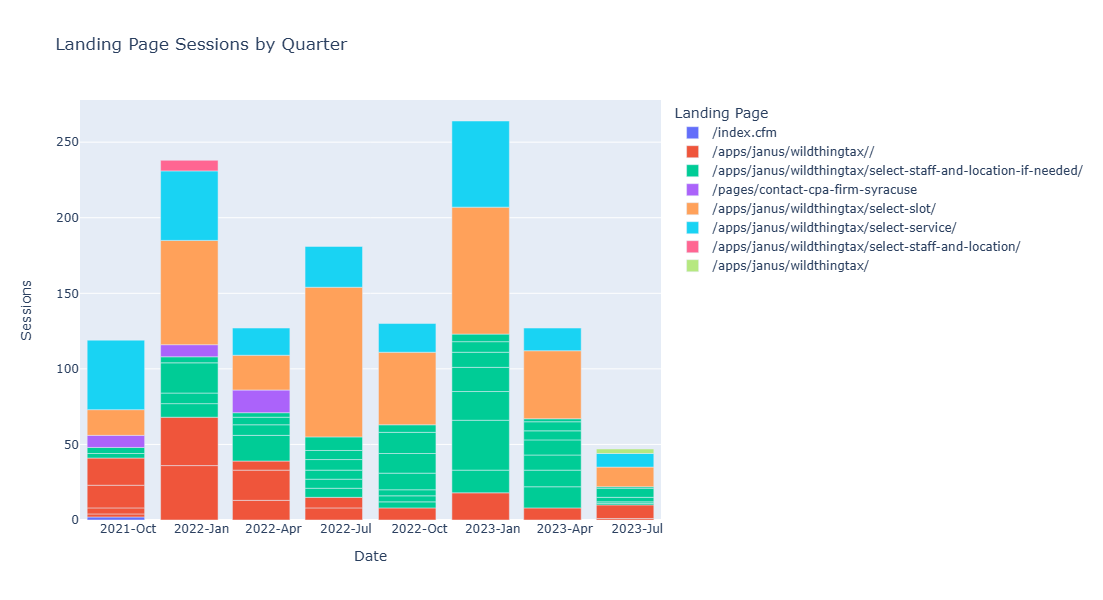

In [109]:
# Read the CSV file
df = pd.read_csv('output/wtt/Landing Pages/consolidated-landing-pages.csv')

# Remove query parameters from URLS:
df['Landing Page'] = df['Landing Page'].apply(lambda x: x.split('?')[0] if isinstance(x, str) and '?' in x else x)

# Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total
exclude_list = ["total"]
fig = px.bar(df.query('`Landing Page` not in @exclude_list'), x='Date', y='Sessions', color='Landing Page', title='Landing Page Sessions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/wtt/wtt-landing-pages.html')

In [102]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('wtt/Events or Conversions', 'goal-urls')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/wtt/Events or Conversions/Analytics GA-021824 Goal URLs 20230401-20230630.csv
Successfully processed Analytics GA-021824 Goal URLs 20230401-20230630.csv
Processing file: data/wtt/Events or Conversions/Analytics GA-021824 Goal URLs 20230101-20230331.csv
Successfully processed Analytics GA-021824 Goal URLs 20230101-20230331.csv
Processing file: data/wtt/Events or Conversions/Analytics GA-021824 Goal URLs 20220401-20220630.csv
Successfully processed Analytics GA-021824 Goal URLs 20220401-20220630.csv
Processing file: data/wtt/Events or Conversions/Analytics GA-021824 Goal URLs 20220701-20220930.csv
Successfully processed Analytics GA-021824 Goal URLs 20220701-20220930.csv
Processing file: data/wtt/Events or Conversions/Analytics GA-021824 Goal URLs 20211001-20211231.csv
Successfully processed Analytics GA-021824 Goal URLs 20211001-20211231.csv
Processing file: data/wtt/Events or Conversions/Analytics GA-021824 Goal URLs 20230701-20230930.csv
Successfully processed An

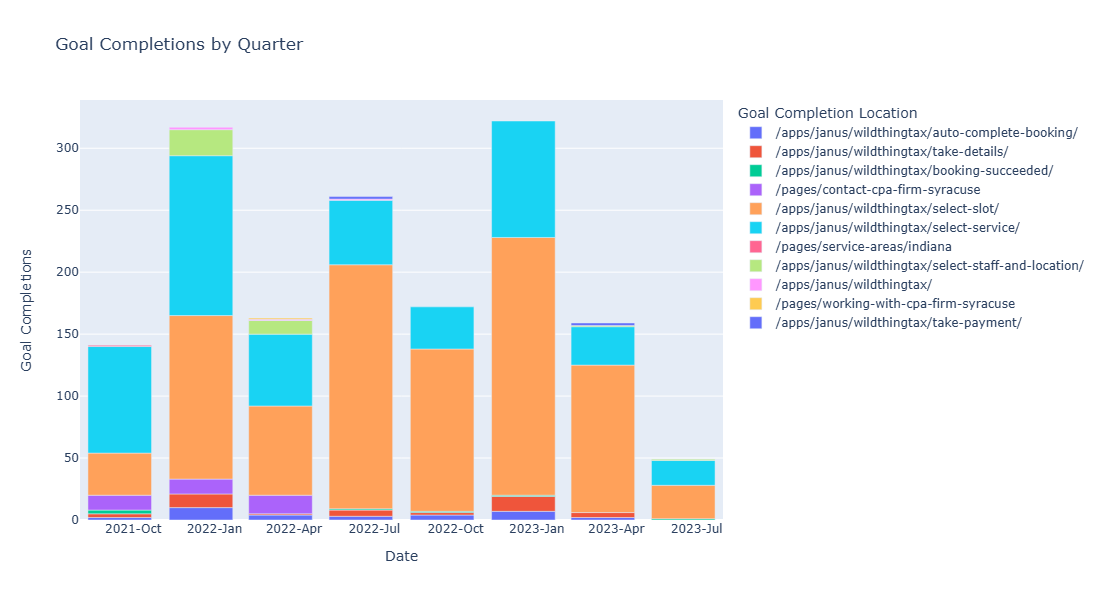

In [110]:
# GOAL URLS / CONVERSIONS  
# Read the CSV file
df_goal_urls = pd.read_csv('output/wtt/Events or Conversions/consolidated-goal-urls.csv')

# # Now, let's create the Date column
df_goal_urls['Date'] = pd.to_datetime(df_goal_urls['Year'].astype(str) + '-' + df_goal_urls['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df_goal_urls['Goal Completions'] = pd.to_numeric(df_goal_urls['Goal Completions'].astype(str).str.replace(',', ''), errors='coerce')
# Sort by date
df_goal_urls = df_goal_urls.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
include_list = [
    "/apps/janus/wildthingtax/select-slot/",
    "/apps/janus/wildthingtax/select-service/",
    "/apps/janus/wildthingtax/take-details/",
    "/apps/janus/wildthingtax/auto-complete-booking/",
    "/apps/janus/wildthingtax/take-payment/",
    "/apps/janus/wildthingtax/",
    "/apps/janus/wildthingtax/select-staff-and-location-if-needed/",
    "/apps/janus/wildthingtax/select-staff-and-location/",
    "/apps/janus/wildthingtax/booking-succeeded/",
    "/pages/contact-cpa-firm-syracuse",
    "/index.cfm",
    "/pages/working-with-cpa-firm-syracuse",
    "/pages/service-areas/indiana",
    "/"
]
fig = px.bar(df_goal_urls.query('`Goal Completion Location` in @include_list'), x='Date', y='Goal Completions', color='Goal Completion Location', title='Goal Completions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/wtt/wtt-goal-urls.html')

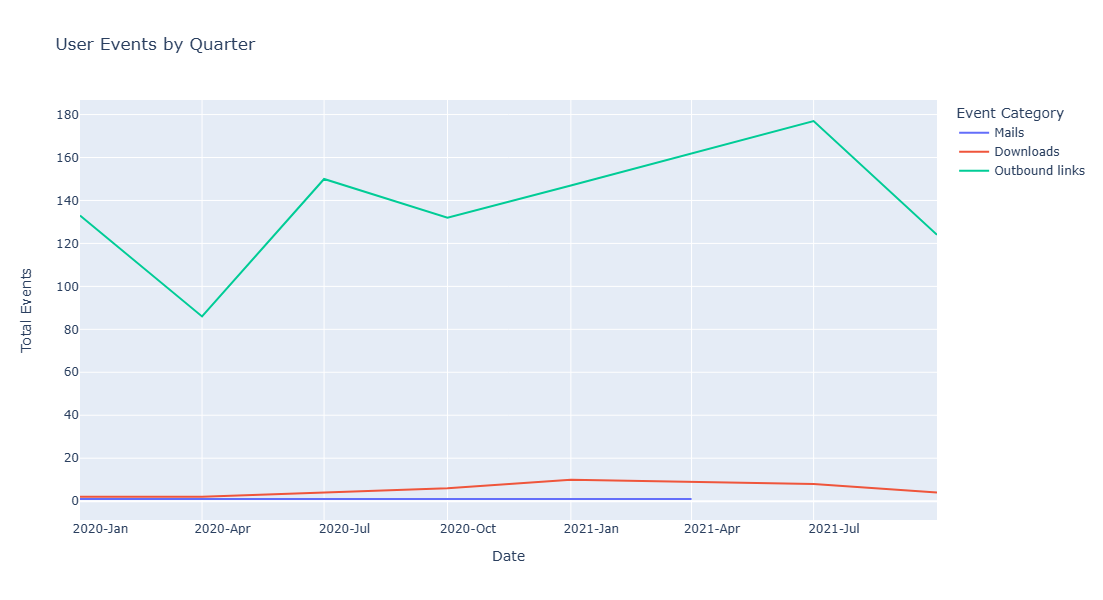

In [53]:
# EVENTS 
# Read the CSV file
df = pd.read_csv('output/wtt/Events or Conversions/consolidated-events.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
# df['Total Events'] = pd.to_numeric(df['Total Events'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
include_list = ["Mails", "Downloads", "Outbound links"]
fig = px.line(df.query('`Event Category` in @include_list'), x='Date', y='Total Events', color='Event Category', title='User Events by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1000,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/wtt/wtt-events.html')